<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Walkthrough of Standard EDA Procedure

_Authors: Kiefer Katovich (SF), Minor updates by David Yerrington (SF)_

---

This lesson uses a Boston housing market dataset to walk through a basic exploratory data analysis procedure, starting from the very beginning with loading the data. 

Though in many if not most cases the EDA procedure will be considerably more involved, this should give you an idea of the basic workflow a data scientist would go through when taking a look at a new dataset.

Note: this lesson is strictly exploratory. We will not be formulating any hypotheses about the data or testing them. In many cases you may have formulated a hypothesis before even looking at your data, which could considerably affect your focus and choices in what to investigate.


### Learning Objectives

- Quickly describe a dataset, including data types, missing values and basic descriptive statistics
- Rename columns (series) in a DataFrame
- Visualize data distributions with box plots
- Standardize variables and explain why this is often a useful thing to do
- Calculate and visualize correlation

### Lesson Guide

- [Description of the Boston Housing Data](#data_description)
- [Loading the data](#load_data)
- [Drop unwanted columns](#drop)
- [Clean corrupted data](#clean)
- [Count null values and drop rows](#drop_nulls)
- [Rename columns](#rename)
- [Investigate potential outliers with boxplots](#boxplots)
- [Look at the correlation between variables](#cov_cor)


<a id='data_description'></a>

### Description of the Boston Housing Data columns

---

The columns of the dataset are coded. The corresponding descriptions are:

    CRIM: per capita crime rate by town 
    ZN: proportion of residential land zoned for lots over 25,000 sq. ft. 
    INDUS: proportion of non-retail business acres per town 
    CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
    NOX: nitric oxides concentration (parts per 10 million) 
    RM: average number of rooms per dwelling 
    AGE: proportion of owner-occupied units built prior to 1940 
    DIS: weighted distances to five Boston employment centers 
    RAD: index of accessibility to radial highways 
    TAX: full-value property-tax rate per 10000 dollars
    PTRATIO: pupil-teacher ratio by town 
    LSTAT: % lower status of the population 
    MEDV: Median value of owner-occupied homes in 1000's of dollars
    
Each row in the dataset represents a different suburb of Boston.

These descriptions of shortened or coded variables are often called "codebooks" or data dictionaries.


**Load packages:**

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<a id='load_data'></a>

### 1. Load the data

---

Import the csv into a pandas DataFrame.

In [2]:
boston_file = './datasets/housing.csv'

In [3]:
df = pd.read_csv(boston_file)

<a id='header'></a>

### 2. Describe the basic format of the data and the columns

---

Use the `.head()` function (and optionally pass in an integer for the number of rows you want to see) to examine what the loaded data looks like. This is a good initial step to get a feel for what is in the csv and what problems may be present.

The `.dtypes` attribute tells you the data type for each of your columns.

In [4]:
# Print out the first 8 rows:
df.head(8)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,"4,09",1,296,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,"4,9671",2,242,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,"4,9671",2,242,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,"6,0622",3,222,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,"6,0622",3,222,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0,0.458,6.430,58.7,"6,0622",3,222,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0,0.524,6.012,66.6,"5,5605",5,311,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0,0.524,6.172,96.1,"5,9505",5,311,15.2,19.15,27.1


In [5]:
# Look at the dtypes of the columns:
df.dtypes

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS            int64
NOX           float64
RM            float64
AGE           float64
DIS            object
RAD            object
TAX             int64
PTRATIO       float64
LSTAT         float64
MEDV          float64
dtype: object

<a id='drop'></a>

### 2. Drop unwanted columns

---

It looks like `Unnamed: 0` is an index. This is redundant, since `pandas` automatically creates an index for us (the bold numbers to the left of the DataFrame).

The `.drop()` method can be used to get rid of a column like so:

```python
df.drop(columns=['list', 'columns', 'to', 'drop'], inplace=True)
```

The `inplace=True` parameter makes our change permanent.

In [4]:
# print out the index object and the first 20 items in the DataFrame's index 
# to see that we have these row numbers already:
df['Unnamed: 0'].head(20)

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
Name: Unnamed: 0, dtype: int64

In [5]:
# Remove the unneccesary column:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,"4,09",1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,"4,9671",2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,"4,9671",2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,"6,0622",3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,"6,0622",3,222,18.7,5.33,36.2


<a id='clean'></a>

### 3. Clean corrupted columns

---

You may have noticed when we examined the `.dtypes` attribute that two of the columns were of type "object", indicating that they are strings. However, we know from the data description above (and we can infer from `df.head()`) that `DIS` and `RAD` should be numeric.

It is pretty common to have numeric columns represented as strings in your data if some of the observations are corrupted. It is important to always check the data types of your columns.

**What is causing the `DIS` column to be encoded as a string?**

Because of the commas

**Use the `.map()` method to remove the commas from each cell.**

In [6]:
np.unique(df.DIS)

array(['1,1296', '1,137', '1,1691', '1,1742', '1,1781', '1,2024',
       '1,2852', '1,3163', '1,3216', '1,3325', '1,3449', '1,3459',
       '1,3567', '1,358', '1,3861', '1,4118', '1,413', '1,4165', '1,4191',
       '1,4254', '1,4261', '1,4394', '1,4395', '1,4547', '1,4608',
       '1,4655', '1,4672', '1,4896', '1,5004', '1,5106', '1,5166',
       '1,5184', '1,5192', '1,5257', '1,5275', '1,5296', '1,5331',
       '1,5539', '1,5741', '1,5804', '1,5888', '1,5894', '1,5895',
       '1,5916', '1,6074', '1,6102', '1,6119', '1,6132', '1,618',
       '1,6232', '1,6334', '1,639', '1,6475', '1,6582', '1,6686',
       '1,6687', '1,6768', '1,7028', '1,7257', '1,7281', '1,7364',
       '1,7455', '1,7494', '1,7523', '1,7554', '1,7572', '1,7573',
       '1,7659', '1,77', '1,7821', '1,7883', '1,7912', '1,794', '1,7984',
       '1,801', '1,8026', '1,8125', '1,8172', '1,8195', '1,8206',
       '1,8209', '1,8226', '1,8347', '1,8498', '1,8589', '1,8629',
       '1,8662', '1,8681', '1,8746', '1,8773', '1,8

In [10]:
df['DIS'] = df['DIS'].map(lambda discell: discell.replace(',','') )

If you run `df.dtypes`, you'll notice that `DIS` is still a string. Let's convert it to an integer.

In [11]:
#df.dtypes
df['DIS'] = df['DIS'].astype(float)
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX          int64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object

**3.B What is causing the `RAD` column to be a string?**

There is a question mark - data entry error

In the cell below, replace all "?" cells with `np.nan`.

In [12]:
np.unique(df['RAD'])

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., 24., nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [8]:
df['RAD'] = df['RAD'].map(lambda radcell: np.nan if radcell=="?" else float(radcell) )

In [13]:
print(df.head())
df.dtypes

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE      DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2    409.0  1.0  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  49671.0  2.0  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  49671.0  2.0  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  60622.0  3.0  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  60622.0  3.0  222     18.7   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  


CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX          int64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object

<a id='drop_nulls'></a>

### 4. Determine how many observations are missing

---

Having replaced the question marks with `np.nan` values, we know that there are some missing observations for the `RAD` column. 

When we start to build models with data, null values in observations are (almost) never allowed. It is important to always see how many observations are missing for each column.

We can count the null values for each column like so:

```python
df.isnull().sum()
```

The `.isull()` method will convert the columns to `True` and `False` values.

The `.sum()` method will then sum these boolean columns, and the total number of null values per column will be returned.

In [14]:
df.shape

(506, 13)

In [13]:
df.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD        40
TAX         0
PTRATIO     0
LSTAT       0
MEDV        0
dtype: int64

**Drop the null values.** 

In this case, lets keep it simple and just drop the rows from the dataset that contain null values. If a column has a ton of null values it often makes more sense to drop the column entirely instead of the rows with null values.

The `.dropna()` function will drop any rows that have _**ANY**_ null values for you.  Use this carefully as you could drop many more rows than expected.

In [14]:
df.shape

(506, 13)

In [15]:
df =df.dropna()
df.shape

(466, 13)

In [16]:
df[df.RAD.isnull()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV


<a id='rename'></a>

### 5. Make the column names more descriptive
---

One minor annoyance is that our column names are not at all intuitive. Here's the codebook again for reference:

    CRIM: per capita crime rate by town 
    ZN: proportion of residential land zoned for lots over 25,000 sq. ft.
    INDUS: proportion of non-retail business acres per town 
    CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
    NOX: nitric oxides concentration (parts per 10 million) 
    RM: average number of rooms per dwelling 
    AGE: proportion of owner-occupied units built prior to 1940 
    DIS: weighted distances to five Boston employment centers
    RAD: index of accessibility to radial highways 
    TAX: full-value property-tax rate per 10000 dollars
    PTRATIO: pupil-teacher ratio by town 
    LSTAT: % lower status of the population 
    MEDV: Median value of owner-occupied homes in 1000's of dollars

Let's rename these to make them more descriptive. 

There two popular methods to rename dataframe columns.
1. Using a _dictionary substitution_, which is very useful if you only want to rename a few of the columns. This method uses the `.rename()` function.
2. Using a _list replacement_, which is quicker than writing out a dictionary, but requires a full list of names.

In [17]:
# Dictionary Method
new_columns_dict = {
        'CRIM':'rate_of_crime',
        'ZN':'residential_zone_pct',
        'INDUS':'business_zone_pct',
        'CHAS':'borders_river',
        'NOX':'oxide_concentration',
        'RM':'average_rooms',
        'AGE':'owner_occup_pct',
        'DIS':'dist_to_work',
        'RAD':'access_to_highway',
        'TAX':'property_tax',
        'PTRATIO':'student_teacher_ratio',
        'LSTAT':'pct_underclass',
        'MEDV':'home_median_value'
    }


In [18]:
df.rename(columns=new_columns_dict, inplace=True)
df.head()

,rate_of_crime,residential_zone_pct,business_zone_pct,borders_river,oxide_concentration,average_rooms,owner_occup_pct,dist_to_work,access_to_highway,property_tax,student_teacher_ratio,pct_underclass,home_median_value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,409.0,1.0,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,49671.0,2.0,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,49671.0,2.0,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,60622.0,3.0,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,60622.0,3.0,222,18.7,5.33,36.2


In [34]:
# List Replacement Method
new_columns_list = ['rate_of_crime', 'residential_zone_pct', 'business_zone_pct',
       'borders_river', 'oxide_concentration', 'average_rooms',
       'owner_occup_pct', 'dist_to_work', 'access_to_highway', 'property_tax',
       'student_teacher_ratio', 'pct_underclass',
       'home_median_value']

In [36]:
df.columns = new_columns_list ## the order has to be consistent
df.head()

,rate_of_crime,residential_zone_pct,business_zone_pct,borders_river,oxide_concentration,average_rooms,owner_occup_pct,dist_to_work,access_to_highway,property_tax,student_teacher_ratio,pct_underclass,home_median_value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,409.0,1.0,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,49671.0,2.0,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,49671.0,2.0,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,60622.0,3.0,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,60622.0,3.0,222,18.7,5.33,36.2


<a id='describe'></a>

### 6. Describe the summary statistics for the columns

<img src="https://snag.gy/07JFa5.jpg" width="350">

---

The `.describe()` function gives summary statistics for each of your columns. What are some, if any, oddities you notice about the columns based on this output?

In [19]:
df.describe()

,rate_of_crime,residential_zone_pct,business_zone_pct,borders_river,oxide_concentration,average_rooms,owner_occup_pct,dist_to_work,access_to_highway,property_tax,student_teacher_ratio,pct_underclass,home_median_value
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,3.326334,11.154506,11.144292,0.075107,0.555840,6.272489,68.504506,33870.045064,9.611588,410.049356,18.462876,12.650129,22.484120
std,7.095767,22.731621,6.820913,0.263848,0.116818,0.696995,28.023878,23233.656022,8.735627,168.921219,2.167158,7.068120,9.017586
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,6.000000,21.000000,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.450000,5.884250,45.450000,17699.500000,4.000000,280.250000,17.400000,7.125000,16.800000
50%,0.256355,0.000000,9.690000,0.000000,0.538000,6.189000,77.150000,27778.000000,5.000000,330.000000,19.050000,11.300000,21.200000
75%,3.689387,12.500000,18.100000,0.000000,0.624000,6.618750,93.975000,47852.500000,24.000000,666.000000,20.200000,16.955000,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,121265.000000,24.000000,711.000000,22.000000,37.970000,50.000000


<a id='boxplots'></a>

### 7. Plot variables with potential outliers using boxplots.

---

Here we will use the seaborn package to plot boxplots of the variables we have identified as potentially having outliers.

Some notes on seaborn's boxplot keyword argument options:

    orient: can be 'v' or 'h' for vertical and horizontal, respectively
    fliersize: the size of the outlier points (pixels I think)
    linewidth: the width of line outlining the boxplot
    notch: show the confidence interval for the median (calculated by seaborn/plt.boxplot)
    saturation: saturate the colors to an extent

There are more keyword arguments available but those are most relevant for now.

_If you want to check out more, place your cursor in the `boxplot` argument bracket and press `shift+tab` (Press four times repeatedly to bring up detailed documentation)._
    

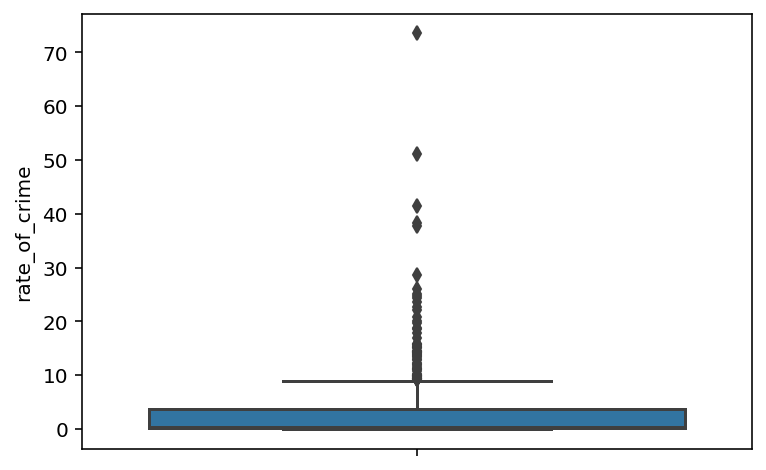

In [20]:
# rate of crime
sns.boxplot(df.rate_of_crime, orient='v')

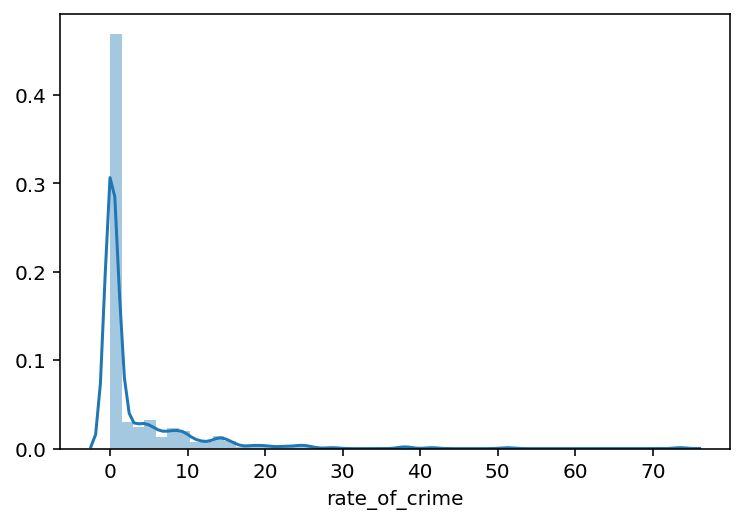

In [21]:
sns.distplot(df.rate_of_crime)

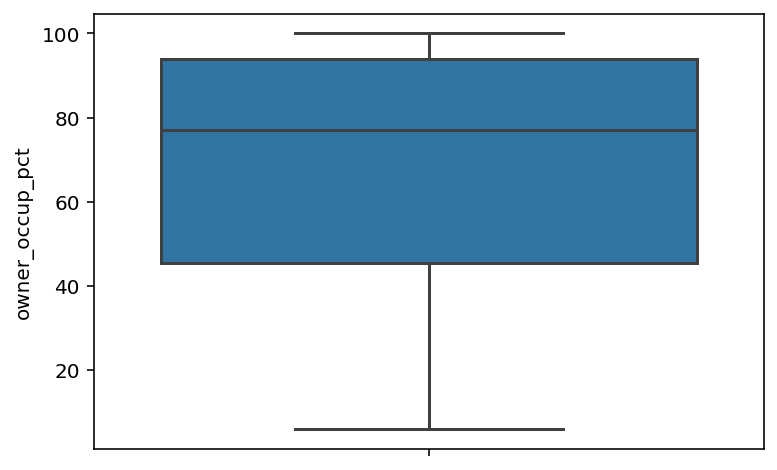

In [22]:
# percent owner occupied
sns.boxplot(df.owner_occup_pct, orient='v')

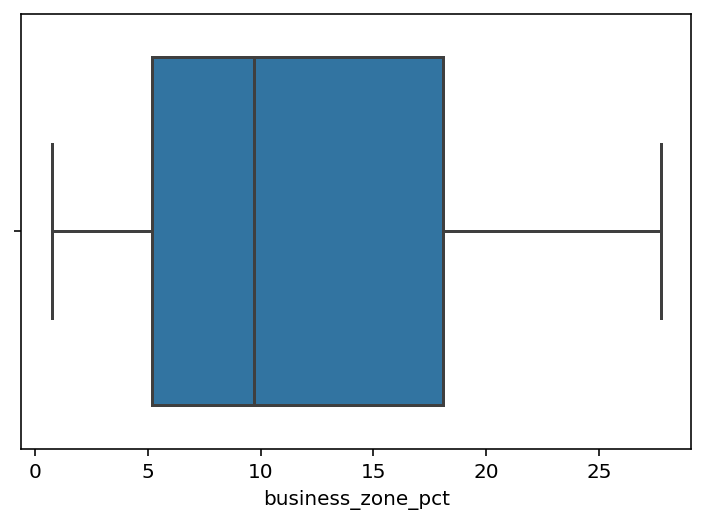

In [23]:
# business zone percent
sns.boxplot(df.business_zone_pct)


<a id='cov_cor'></a>

### 8. Correlation matrices

---

A great way to easily get a feel for linear relationships between your variables is with a correlation matrix.

Below is the formula for the correlation between two variables $X$ and $Y$:

#### 8.A Correlation

### $$ \text{pearson correlation}\;r = cor(X, Y) =\frac{cov(X, Y)}{std(X)std(Y)}$$

#### 8.B The correlation matrix

We can see the correlation between all the numeric variables in our dataset by using the `.corr()` method.

It's useful to get a feel for which columns are correlated. The `.corr() method` can help you decide what is worth investigating further (though with a lot of variables, the matrix can be a bit overwhelming...)

In [24]:
np.corrcoef(df.access_to_highway, df.home_median_value)

array([[ 1.       , -0.3708425],
       [-0.3708425,  1.       ]])

In [25]:
df.corr()

,rate_of_crime,residential_zone_pct,business_zone_pct,borders_river,oxide_concentration,average_rooms,owner_occup_pct,dist_to_work,access_to_highway,property_tax,student_teacher_ratio,pct_underclass,home_median_value
rate_of_crime,1.000000,-0.224533,0.453573,-0.059286,0.454794,-0.259346,0.385813,-0.328129,0.686361,0.638655,0.318062,0.488930,-0.402687
residential_zone_pct,-0.224533,1.000000,-0.534804,-0.043174,-0.511765,0.312325,-0.564412,0.497753,-0.317120,-0.313394,-0.386644,-0.414598,0.357747
business_zone_pct,0.453573,-0.534804,1.000000,0.065866,0.760027,-0.404952,0.635092,-0.555231,0.605772,0.738231,0.387690,0.611393,-0.490163
borders_river,-0.059286,-0.043174,0.065866,1.000000,0.091785,0.101140,0.091571,-0.115804,-0.009709,-0.040180,-0.127876,-0.056845,0.188416
oxide_concentration,0.454794,-0.511765,0.760027,0.091785,1.000000,-0.305690,0.728478,-0.610649,0.598606,0.656462,0.163856,0.590495,-0.420656
average_rooms,-0.259346,0.312325,-0.404952,0.101140,-0.305690,1.000000,-0.238659,0.154045,-0.214301,-0.298968,-0.355091,-0.615721,0.690857
owner_occup_pct,0.385813,-0.564412,0.635092,0.091571,0.728478,-0.238659,1.000000,-0.632897,0.452948,0.505761,0.247303,0.599298,-0.374378
dist_to_work,-0.328129,0.497753,-0.555231,-0.115804,-0.610649,0.154045,-0.632897,1.000000,-0.372219,-0.410172,-0.120684,-0.422957,0.181015
access_to_highway,0.686361,-0.317120,0.605772,-0.009709,0.598606,-0.214301,0.452948,-0.372219,1.000000,0.908304,0.468876,0.480370,-0.370843
property_tax,0.638655,-0.313394,0.738231,-0.040180,0.656462,-0.298968,0.505761,-0.410172,0.908304,1.000000,0.465972,0.543232,-0.462720


In [26]:
df.corr().sort_values('rate_of_crime',ascending=False)

,rate_of_crime,residential_zone_pct,business_zone_pct,borders_river,oxide_concentration,average_rooms,owner_occup_pct,dist_to_work,access_to_highway,property_tax,student_teacher_ratio,pct_underclass,home_median_value
rate_of_crime,1.000000,-0.224533,0.453573,-0.059286,0.454794,-0.259346,0.385813,-0.328129,0.686361,0.638655,0.318062,0.488930,-0.402687
access_to_highway,0.686361,-0.317120,0.605772,-0.009709,0.598606,-0.214301,0.452948,-0.372219,1.000000,0.908304,0.468876,0.480370,-0.370843
property_tax,0.638655,-0.313394,0.738231,-0.040180,0.656462,-0.298968,0.505761,-0.410172,0.908304,1.000000,0.465972,0.543232,-0.462720
pct_underclass,0.488930,-0.414598,0.611393,-0.056845,0.590495,-0.615721,0.599298,-0.422957,0.480370,0.543232,0.359853,1.000000,-0.733697
oxide_concentration,0.454794,-0.511765,0.760027,0.091785,1.000000,-0.305690,0.728478,-0.610649,0.598606,0.656462,0.163856,0.590495,-0.420656
business_zone_pct,0.453573,-0.534804,1.000000,0.065866,0.760027,-0.404952,0.635092,-0.555231,0.605772,0.738231,0.387690,0.611393,-0.490163
owner_occup_pct,0.385813,-0.564412,0.635092,0.091571,0.728478,-0.238659,1.000000,-0.632897,0.452948,0.505761,0.247303,0.599298,-0.374378
student_teacher_ratio,0.318062,-0.386644,0.387690,-0.127876,0.163856,-0.355091,0.247303,-0.120684,0.468876,0.465972,1.000000,0.359853,-0.499740
borders_river,-0.059286,-0.043174,0.065866,1.000000,0.091785,0.101140,0.091571,-0.115804,-0.009709,-0.040180,-0.127876,-0.056845,0.188416
residential_zone_pct,-0.224533,1.000000,-0.534804,-0.043174,-0.511765,0.312325,-0.564412,0.497753,-0.317120,-0.313394,-0.386644,-0.414598,0.357747


It can be difficult to spot any outliers simply by staring at our correlation matrix. To help get around this issue, let's use Seaborn's `.heatmap()` method along with our correlation matrix.

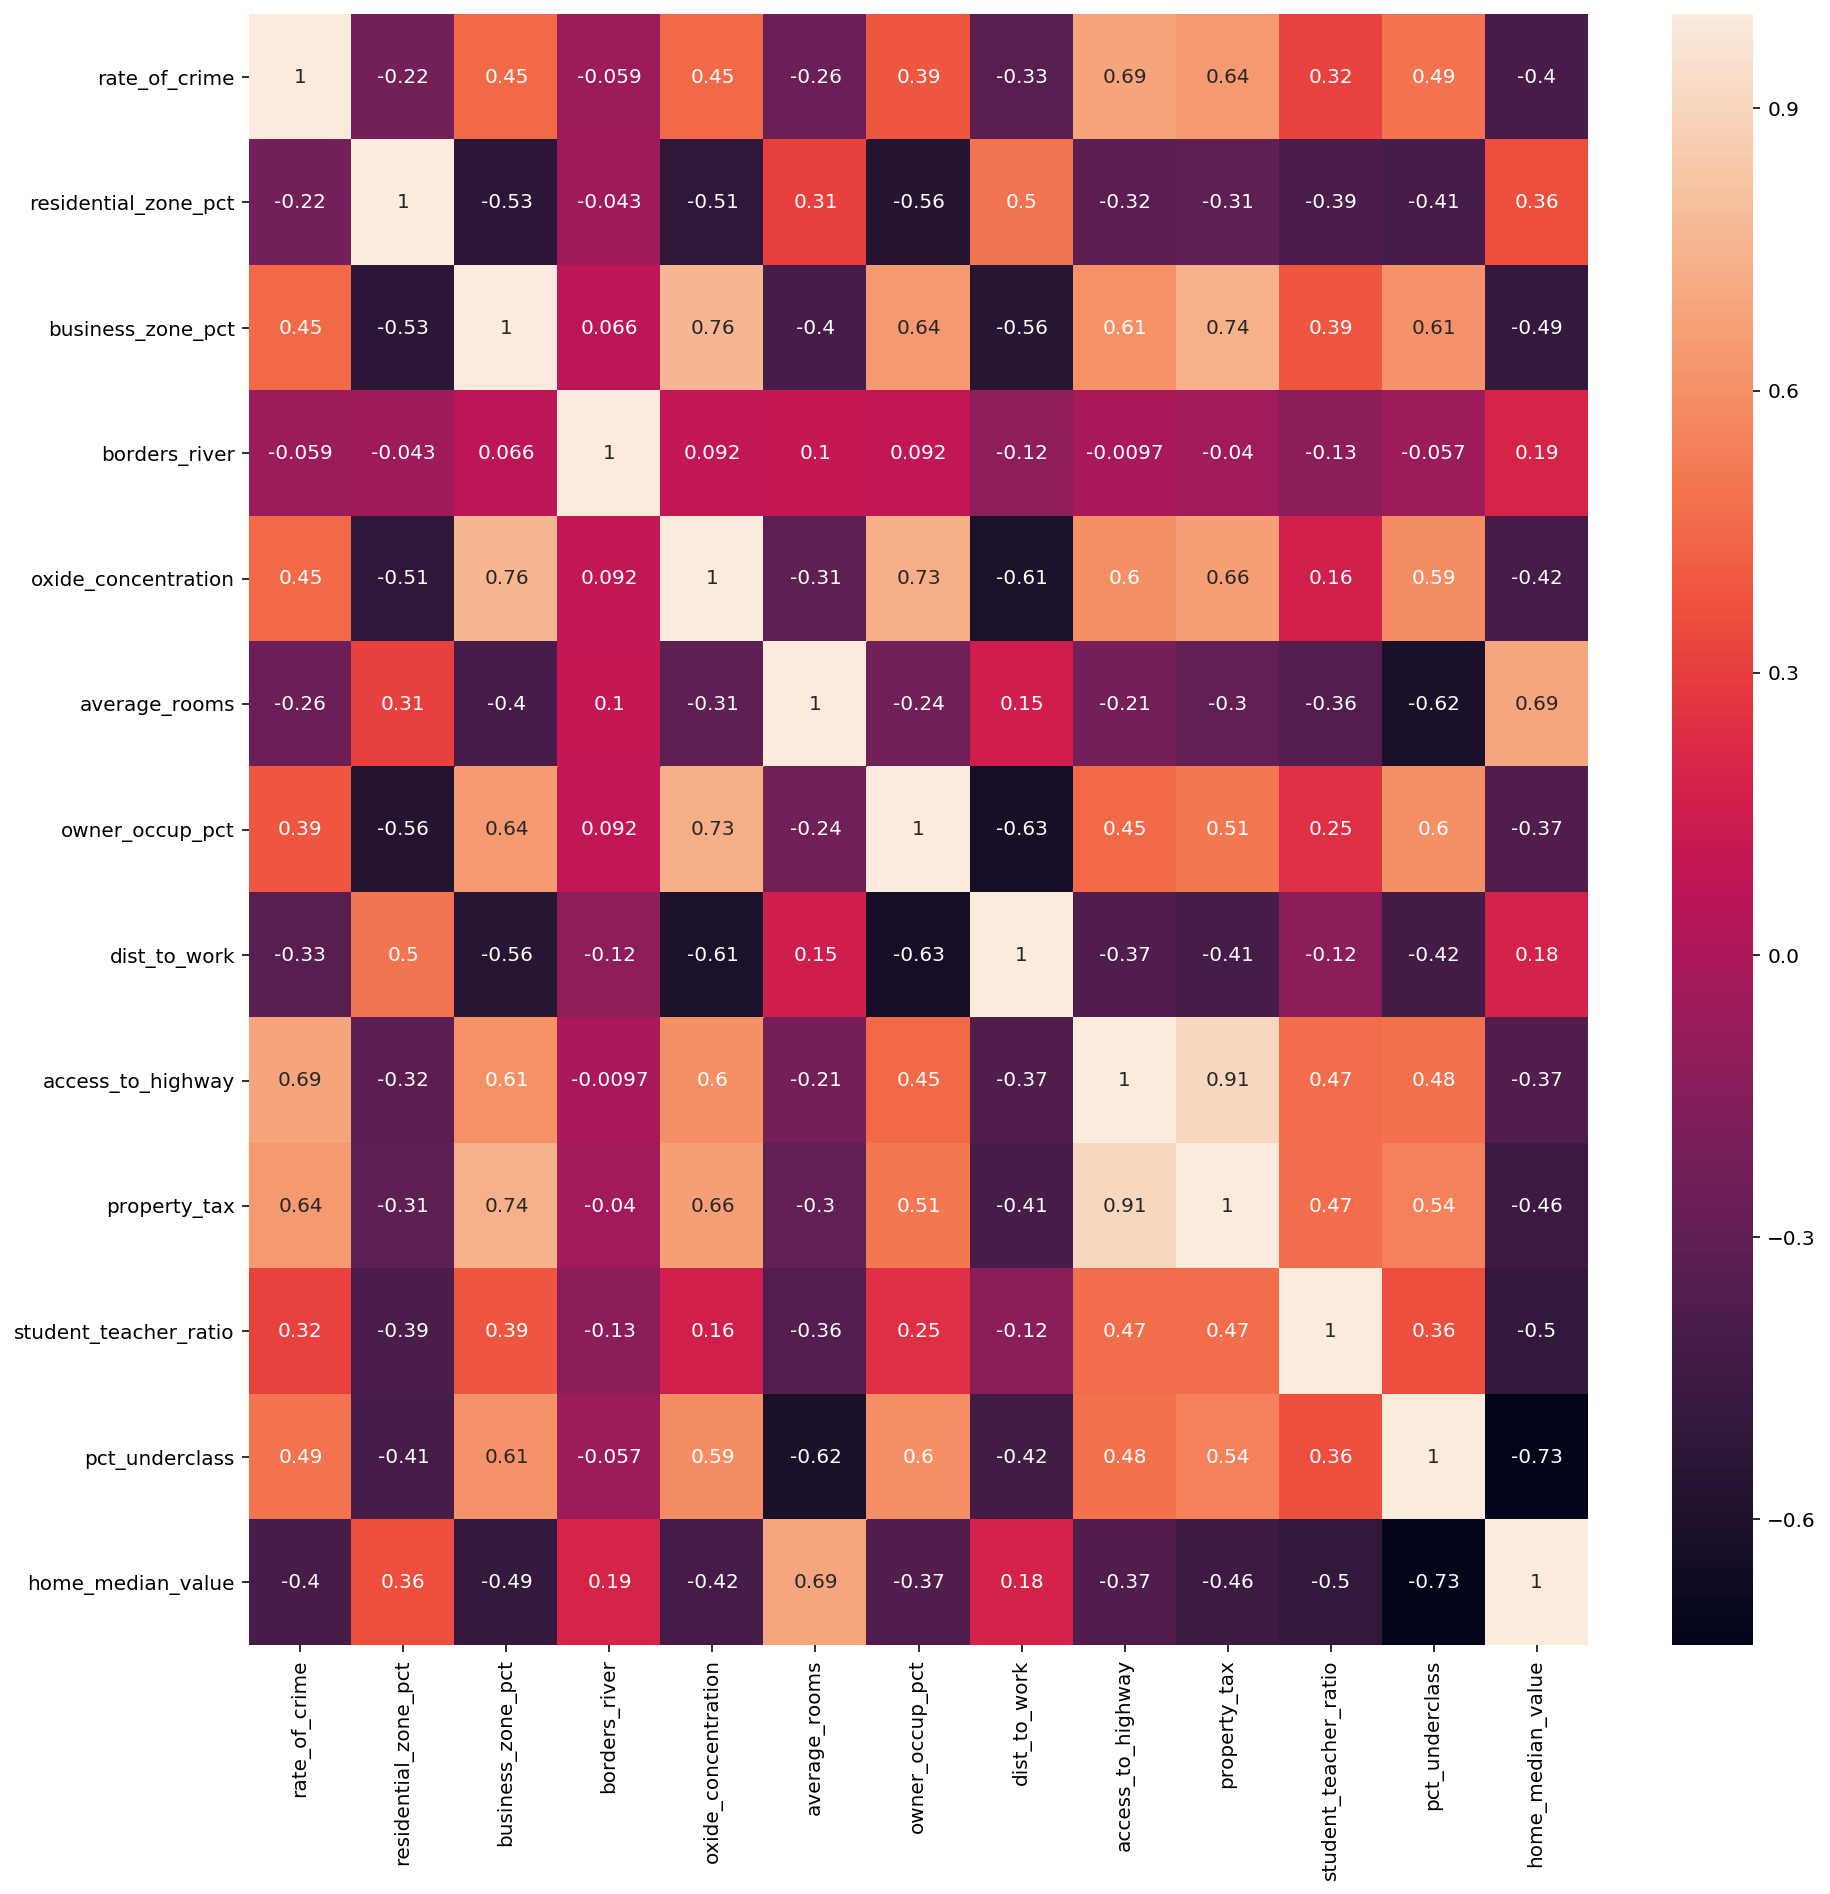

In [25]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

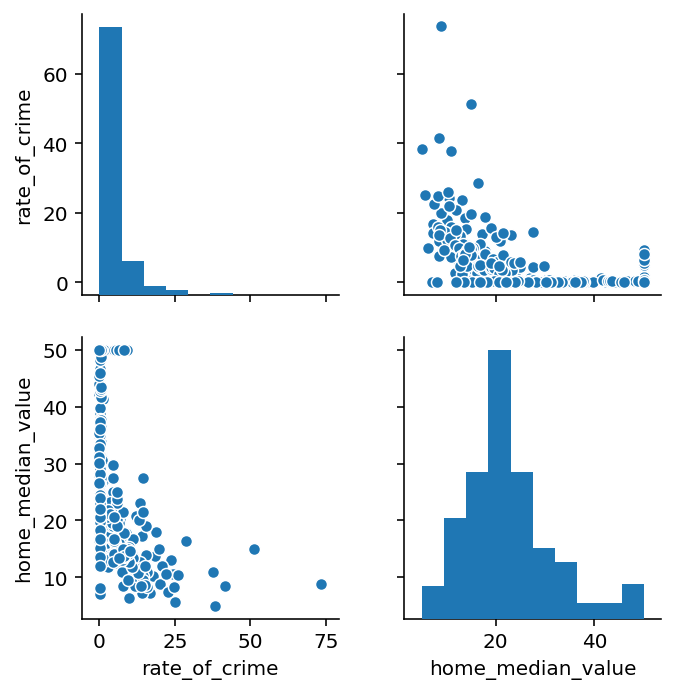

In [49]:
sns.pairplot(df[['rate_of_crime','home_median_value']])

In [28]:
#Math for correlation

# variance of a column
df.rate_of_crime.mean()
#print(df.rate_of_crime.std() ** 2)
n=df.shape[0]
df.rate_of_crime_var = ((df.rate_of_crime - df.rate_of_crime.mean()) **2)
df.rate_of_crime_var.sum()/ (n-1)

50.34990465471494

In [29]:
#Covariance https://corporatefinanceinstitute.com/resources/knowledge/finance/covariance/
numerator = ((df.rate_of_crime - df.rate_of_crime.mean()) * (df.home_median_value - df.home_median_value.mean())).sum() / (n-1)
numerator/(df.rate_of_crime.std()*df.home_median_value.std())

-0.4026866151110187